# Salary Prediction

In [3]:
import numpy as np, seaborn as sns, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('C:/Users/kasm/Downloads/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
X=df.YearsExperience.values.reshape(-1,1)    # Should be 2D 
y=df.Salary.values                           # 1D 

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

In [9]:
len(X_train)

20

In [10]:
# Scaling

In [11]:
#from sklearn.preprocessing import StandardScaler

#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

# Fitting Simple Linear Regression to the Training set

In [12]:
from sklearn.linear_model import LinearRegression

lm =  LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [13]:
predictions = lm.predict(X_test)

# Scatter plot of y_test vs Prediction.

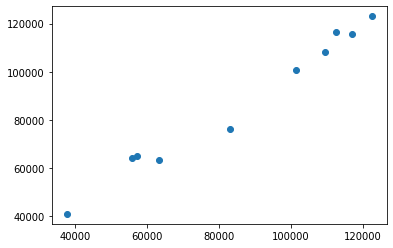

In [14]:
plt.scatter(y_test,predictions)

# Distplot ((y_test-Predictions)).....( Should come Normal distribution otherwise eliminate Linear Reg )

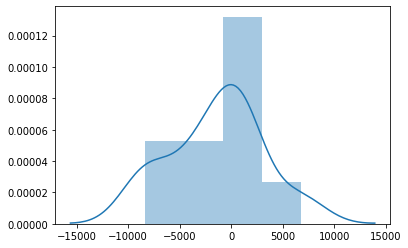

In [15]:
sns.distplot((y_test-predictions))

# Visualizing the Training set results  ( Optional )

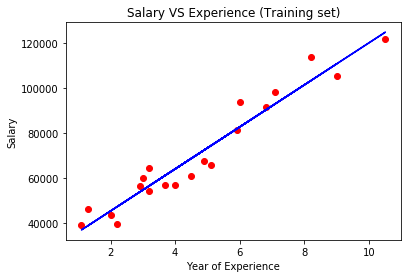

In [16]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, lm.predict(X_train), color='blue')

plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

# Visualizing the Test set results  ( Optional )

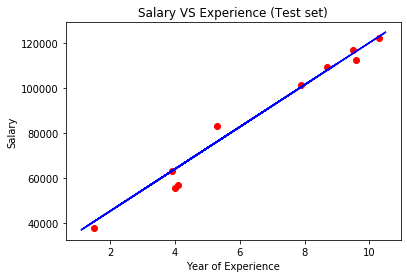

In [17]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, lm.predict(X_train), color='blue')

plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

# Also Calculate: r2_score , Coef_ , intercept_ , MAE , MSE , RMSE

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9749154407708353

In [19]:
lm.intercept_

26816.192244031176

In [20]:
lm.coef_

array([9345.94244312])

In [21]:
from sklearn import metrics

In [22]:
metrics.mean_absolute_error(y_test,predictions)    #MAE

3426.42693743071

In [23]:
metrics.mean_squared_error(y_test,predictions)     #MSE

21026037.329511303

In [24]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))     #RMSE

4585.415720467589

# Lets Predict...!

In [116]:
X_test=np.array(5).reshape(-1,1)
prediction=lm.predict(X_test)
prediction

array([73545.90445964])

# ...END...